# Machine Learning & Statistics- Assessment 2019

![title](img/Image2.png)

# The Boston House Price Dataset

## Set up the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.datasets import load_boston 
from string import ascii_letters

In [2]:
boston = load_boston()
print(boston.data.shape)


(506, 13)


<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No|Attributes      |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |

<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No |Attributes     |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |
|4.   |CHAS           |Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|5.   |NOX            |nitric oxides concentration (parts per 10 million)                  |
|6.   |RM             |the average number of rooms per dwelling                            |
|7.   |AGE            |the proportion of owner-occupied units built prior to 1940          |
|8.   |DIS            |weighted distances to five Boston employment centres                |
|9.   |RAD            |index of accessibility to radial highways                           |
|10.  |TAX            |full-value property-tax rate per 10,000                             |
|11.  |PTRATIO        |the pupil-teacher ration by the town                                |
|12.  |B-1000(BK-0.63)|Where Bk is the proportion of blacks by the town                    | 
|13.  |LSTAT          |percentage lower status of the population                           |
|14.  |MEDV           |the median value of owner-occupied homes in  1000's                 |

In [3]:
from sklearn.datasets import load_boston
data = load_boston()

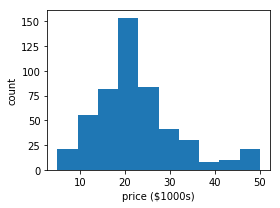

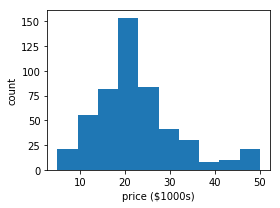

In [10]:
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [7]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [12]:
df.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0

In [4]:
# http://www.neural.cz/dataset-exploration-boston-house-pricing.html
import seaborn as sns # just a conventional alias, don't know why 
sns.corrplot(df) # compute and plot the pair-wise correlations
# save to file, remove the big white borders
plt.savefig('attribute_correlations.png', tight_layout=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [18]:
boston.corr()

AttributeError: corr

In [19]:
x = df[['CRIM', 'CHAS', 'RM']]

In [31]:
y = df['target']

In [24]:
import sklearn.linear_model as lm

In [32]:
m = lm.LinearRegression()

In [33]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
m.intercept_

-28.865119823741505

In [35]:
m.coef_

array([-0.25769686,  3.77272318,  8.28418404])

In [36]:
m.score(x,y)

0.5512734592910271

In [37]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['CRIM'] + u * x['CHAS'] + v * x['RM'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.5512734592910271

In [5]:
boston.T.plot()
plt.ylabel('target')

AttributeError: T

C:\Users\Ger\Anaconda3\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


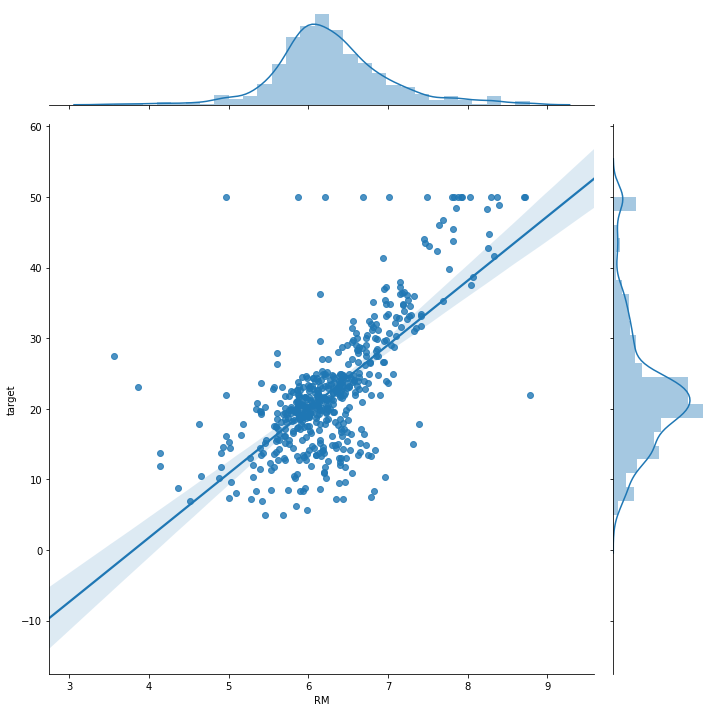

In [10]:
sns.jointplot(x='RM', y='target', data=df, kind='reg', height=10);
plt.show();